In [1]:
import shap 
import pandas as pd 
import joblib

In [2]:
X_train_hou=pd.read_csv('../../Data/Auction_Management/Overdue_Estimate/preprocessing/data_hou.csv')
clf_hou=joblib.load('Overdue_Estimate/model/hou_overdue_detection.pkl')

/Users/huangzhiwei/anaconda3/lib/python3.6/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.21.1 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [3]:
#X_demo=shap.sample(X_train_hou, 100)
explainer=shap.KernelExplainer(clf_hou.predict,X_train_hou.iloc[:100,:-1]) 

In [4]:
shap_values=explainer.shap_values(X_train_hou.iloc[:100,:-1])

/Users/huangzhiwei/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


In [6]:
import numpy as np

In [7]:
shap_mean=np.mean(abs(shap_values),axis=0)

In [8]:
shap_mean_df_hou=pd.DataFrame({'columns_name':X_train_hou.columns[:-1],'shap_mean_values':shap_mean}).sort_values(by='shap_mean_values').reset_index().drop('index',axis=1)

In [10]:
sum(shap_mean_df_hou['shap_mean_values'])

0.7530090187590192

In [11]:
shap_mean_df

NameError: name 'shap_mean_df' is not defined

In [12]:
index=np.arange(len(X_train_hou.columns[:-1]))

In [13]:
import matplotlib.pyplot as plt

In [14]:
import matplotlib
#解决中文显示问题
plt.rcParams['font.sans-serif'] = ['simhei'] # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

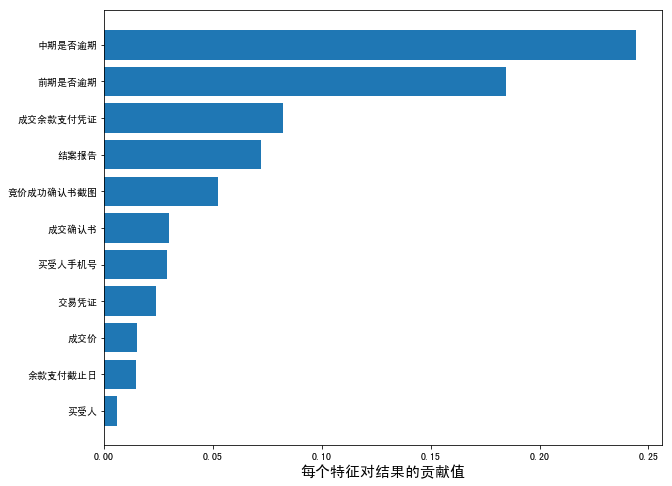

In [16]:
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111)
    ax.barh(index, shap_mean_df_hou['shap_mean_values'].values)
    ax.set_yticks(index)
    ax.set_yticklabels(shap_mean_df_hou['columns_name'].values)
    
    ax.set_xlabel('每个特征对结果的贡献值', size=15)
    plt.savefig('shap_hou.png')

In [17]:
X_train_zhong=pd.read_csv('../../Data/Auction_Management/Overdue_Estimate/preprocessing/data_zhong.csv') 
clf_zhong=joblib.load('Overdue_Estimate/model/mid_overdue_detection.pkl')
explainer=shap.KernelExplainer(clf_zhong.predict,X_train_zhong.iloc[:,:-1]) 
shap_values=explainer.shap_values(X_train_zhong.iloc[:,:-1])

/Users/huangzhiwei/anaconda3/lib/python3.6/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.21.1 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
Using 2592 background data samples could cause slower run times. Consider using shap.kmeans(data, K) to summarize the background as K weighted samples.


/Users/huangzhiwei/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


In [18]:
shap_mean=np.mean(abs(shap_values),axis=0)
shap_mean_df_zhong=pd.DataFrame({'columns_name':X_train_zhong.columns[:-1],'shap_mean_values':shap_mean}).sort_values(by='shap_mean_values').reset_index().drop('index',axis=1)

In [19]:
index=np.arange(len(X_train_zhong.columns[:-1]))

In [20]:
shap_values.shape

(2592, 5)

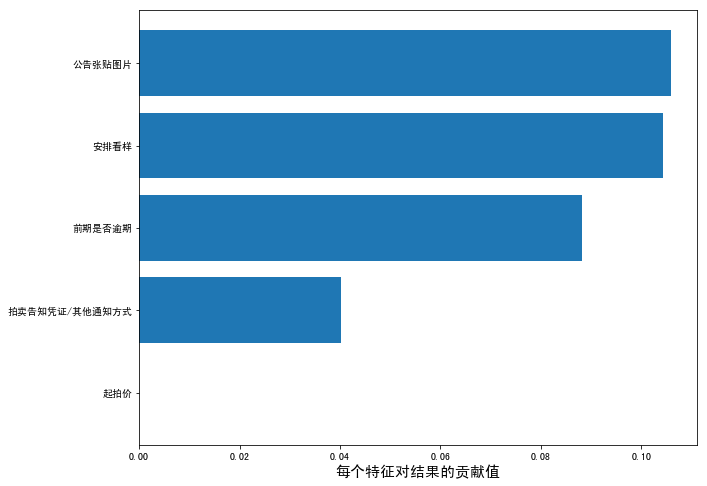

In [22]:
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111)
    ax.barh(index, shap_mean_df_zhong['shap_mean_values'].values)
    ax.set_yticks(index)
    ax.set_yticklabels(shap_mean_df_zhong['columns_name'].values)
    
    ax.set_xlabel('每个特征对结果的贡献值', size=15)
    plt.savefig('shap_zhong.png')

In [55]:
X_train_qian=pd.read_csv('../../Data/Auction_Management/Overdue_Estimate/preprocessing/data_qian.csv') 
clf_qian=joblib.load('Overdue_Estimate/model/pre_overdue_detection.pkl')


/Users/huangzhiwei/anaconda3/lib/python3.6/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.21.1 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
Using 2651 background data samples could cause slower run times. Consider using shap.kmeans(data, K) to summarize the background as K weighted samples.


In [59]:
X_demo=shap.kmeans(X_train_qian.iloc[:,:-1], 10)
explainer=shap.KernelExplainer(clf_qian.predict,X_demo) 

In [60]:
shap_values=explainer.shap_values(X_train_qian.iloc[:,:-1])

/Users/huangzhiwei/anaconda3/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


In [61]:
shap_mean=np.mean(abs(shap_values),axis=0)
shap_mean_df=pd.DataFrame({'columns_name':X_train_qian.columns[:-1],'shap_mean_values':shap_mean}).sort_values(by='shap_mean_values').reset_index().drop('index',axis=1)

In [62]:
index=np.arange(len(X_train_qian.columns[:-1]))

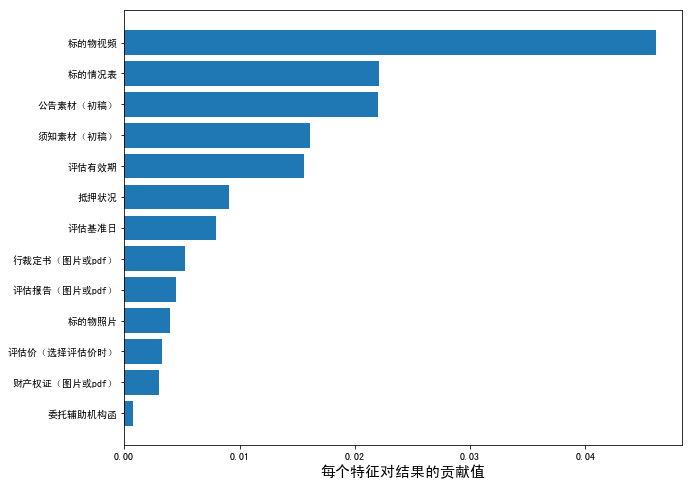

In [64]:
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111)
    ax.barh(index, shap_mean_df['shap_mean_values'].values)
    ax.set_yticks(index)
    ax.set_yticklabels(shap_mean_df['columns_name'].values)
    
    ax.set_xlabel('每个特征对结果的贡献值', size=15)
    plt.savefig('shap_qian.png')